# Isolation Forest

**Isolation Forest** is an unsupervised machine learning algorithm used for anomaly detection. It works by isolating anomalies in the dataset by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

## How it works?

1. **Random Selection of Features**: At each step of the algorithm, a random feature is selected from the dataset.
2. **Random Selection of Split Value**: A random split value is chosen within the range of the selected feature's values.
3. **Partitioning of Data**: The dataset is partitioned based on the selected feature and split value. Data points with feature values smaller than the split value are assigned to one side of the partition, while data points with feature values greater than the split value are assigned to the other side.
4. **Recursive Partitioning**: Steps 1-3 are repeated recursively until all data points are isolated or a specified maximum tree depth is reached.
5. **Anomaly Score Calculation**: Anomaly scores are calculated for each data point based on the number of partitions required to isolate it. Data points that require fewer partitions (i.e., data points that are easier to isolate) are considered anomalies.
6. **Thresholding**: Anomaly scores can be compared to a predefined threshold to determine which data points are anomalies. Alternatively, the top N data points with the highest anomaly scores can be considered anomalies.

NOTE:
1. In Isolation Forest, the feature selected for split partition must be of numeric type. So it can define meaningful splits. Categorical or non-numeric features do not have a natural ordering, making it impossible to define splits based on them.
2. Isolation Forest does not require feature standardization before processing.
3. The number of partitions required to isolate a data point is the depth from root the partition(node) that contains the data point.

## Limitations

* Deminsions: <br>
  It performs well with high-dimensional datasets, but it may not be the best choice for low-dimensional datasets where density or distance-based methods could perform better.<br>
  It's not the higher the better, while dimention increasing, the concept of distance becomes less meaningful, making it challenging to identify anomalies based on isolation.
* Anomaly scores vary among multiple runs.<br>
  To mitigate the impact of variability on the performance, we may take the average or median score over multiple runs to stabilize the scores. Additionally, parameter tuning and robustness analysis also helps.
* Overlapping Clusters: Isolation Forest may not perform well when the normal and anomalous instances overlap significantly in feature space.
* Sequential Data: Isolation Forest is not explicitly designed to handle sequential or time-series data, where the ordering and temporal dependencies between data points are important. While it may be adapted for sequential anomaly detection tasks, other algorithms such as Hidden Markov Models or Recurrent Neural Networks may be more suitable for such data types.
* Localized Anomalies: Isolation Forest may not effectively detect localized anomalies that are surrounded by normal instances. Since the algorithm partitions the feature space randomly, it may miss anomalies that are embedded within dense regions of normal data.
* Sensitive to Parameter Settings: Isolation Forest's performance can be sensitive to parameter settings such as the number of trees in the forest, the maximum tree depth, and the subsampling ratio. Suboptimal parameter choices may lead to decreased detection accuracy or increased computational complexity.

## Advantages

* No Assumption of Data Distribution: Unlike statistical methods, it does not assume that the data follows a normal distribution.
* Efficiency: because it constructs a relatively small number of trees, Isolation Forest is more efficient with high-dimensional data compared to distance-based and density-based methods.
* Scalability: It handles large datasets well, as it builds smaller trees compared to standard tree-based models.
* Insensitivity to Feature Scaling: Isolation Forest is not sensitive to feature scaling or normalization.
* Applicability to Unlabeled Data: Isolation Forest does not require labeled data for training, making it suitable for unsupervised anomaly detection tasks where only normal data is available for training.

## Example

In [1]:
# Importing necessary libraries
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd

# Generating sample data
np.random.seed(42)

# Generating normal data points
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 2))  # 1000 x 2 array
# Generating some outliers
outliers = np.random.uniform(low=-10, high=10, size=(50, 2))    # 50 x 2 array

# Combining normal data with outliers
data = np.vstack([normal_data, outliers])  # 1050 x 2 array

# Creating and fitting the Isolation Forest model
clf = IsolationForest(
    contamination=0.05,   # Set the expected proportion of outliers
    random_state=42
)
clf.fit(data)

# Predicting the anomaly scores for each data point
anomaly_scores = clf.decision_function(data)

# Labeling the data points as normal (1) or outliers (-1) based on the anomaly scores
labels = clf.predict(data)

# Outputting the results
print("Anomaly Scores:")
print(anomaly_scores)
print("\nLabels:")
print(labels)

df = pd.DataFrame(data, columns=['row', 'col'])
df['anomaly_scores'] = pd.Series(anomaly_scores)
df['labels'] = pd.Series(labels)
display(df)

Anomaly Scores:
[ 0.18642063  0.14116264  0.1819305  ... -0.12750584 -0.1807441
 -0.13311708]

Labels:
[ 1  1  1 ... -1 -1 -1]


,row,col,anomaly_scores,labels
0,0.496714,-0.138264,0.186421,1
1,0.647689,1.523030,0.141163,1
2,-0.234153,-0.234137,0.181930,1
3,1.579213,0.767435,0.138738,1
4,-0.469474,0.542560,0.177879,1
...,...,...,...,...
1045,9.015454,4.050810,-0.210135,-1
1046,-4.038956,-7.892702,-0.207151,-1
1047,5.636477,2.882984,-0.127506,-1
1048,-9.036280,-2.798991,-0.180744,-1


<Axes: xlabel='row', ylabel='col'>

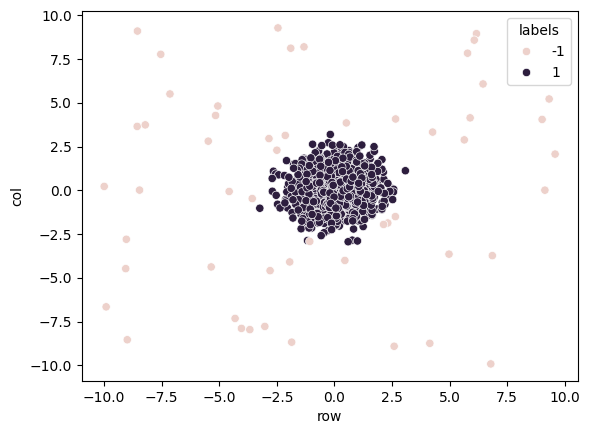

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot
sns.scatterplot(
    data=df,
    x='row', 
    y='col',
    hue="labels",   # map smoker value to the color of the points
)